In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as scc

In [2]:
d_convRy2eV=scc.physical_constants['Rydberg constant times hc in eV']
convRy2eV=d_convRy2eV[0]

In [50]:
plt.rcParams['font.size'] = 19

# Input NIST data

In [4]:
fnist='/home/ale/autovarlambda/gpyopt_varlambda/be0+_varlam/'
enerNIST=pd.read_csv(fnist+'NIST_terms.dat',header='infer',skiprows=[0,2],sep='\s+')
cfgsNIST=pd.read_csv(fnist+'NIST_cfgs.dat',header='infer',skiprows=[0,2],sep='\s+')
E_NIST=pd.read_csv(fnist+'NIST_energies.dat',header=None,skiprows=3,sep='\s+')
etot_NIST=E_NIST.loc[0][10]
eion=E_NIST.loc[1][10]
enerNIST.drop(columns='(Ry)',inplace=True)
s=[]
l=[]
cf=[]
nterms=len(enerNIST)
ncfgs=len(cfgsNIST)
for i in range(nterms):
    cfdum=enerNIST.loc[i][0]
    termdum=enerNIST.loc[i][1]
    sdum=int(termdum[0])
    ldum=termdum[1]
    if ldum=='S': ldum=0
    if ldum=='P': ldum=1
    if ldum=='D': ldum=2
    if ldum=='F': ldum=3
    if ldum=='G': ldum=4
    if ldum=='H': ldum=5
    s.append(sdum)
    l.append(ldum)
    for j in range(ncfgs):
        if cfgsNIST.loc[j]['CFG']==cfdum: cf.append(cfgsNIST.loc[j]['i'])
enerNIST.insert(2, 'S', s)
enerNIST.insert(3, 'L', l)
enerNIST.insert(4, 'CF', cf)

In [5]:
def load_ener(folder):
    enert=pd.read_csv(folder+"str/TERMS",sep=" ",delimiter="\s+",header="infer")
    nrow=len(enert)
    idxtot=enert.index[nrow-1]
    etot=enert.loc[idxtot]['ENERGY(RYD)']
    enert.drop(idxtot,inplace=True)
    return enert, etot

In [6]:
def load_inpdata(folder):
    data=pd.read_csv(folder+"adas/sg.dat",sep=" ",delimiter="\s+",header=None,skiprows=[0,1])
    enert, etot=load_ener(folder)
#     enert['ENERGY(RYD)']=enert['ENERGY(RYD)']*convRy2eV
    return data, enert, etot

In [7]:
def match_NIST(ener,enerNIST):
    nas=len(ener)
    ncols=len(ener.columns)
    nnist=len(enerNIST)
    newnist=[0]*nas
    idxnist=[0]*nas
    for i in range(nas):
        sas=ener.loc[i]['S']
        las=ener.loc[i]['L']
        cfas=ener.loc[i]['CF']
        for j in range(nnist):
            snist=enerNIST.loc[j]['S']
            lnist=enerNIST.loc[j]['L']
            cfnist=enerNIST.loc[j]['CF']
            if (snist==sas) & (lnist==las) & (cfnist==cfas):
                newnist[i]=enerNIST.loc[j]['Level']
                idxnist[i]=j
    ener.insert(ncols,'NIST',newnist)
    ener.insert(ncols+1,'idx',idxnist)
    nrows=len(ener)
    nnist=len(enerNIST)
    nistindex=enerNIST.index
    dum=[]
    for i in range(nrows):
        idx=ener.iloc[i]['idx']
        for j in nistindex:
            if j==idx: 
                dum.append(enerNIST.loc[idx]['Configuration'][4:]+" "+enerNIST.loc[idx]['Term'])
    ener['term']=dum
    erpvals=[]
    for i in range(nrows):
        dum=-1.
        nistvalue=ener.loc[i]['NIST']
        if nistvalue!=0: dum=abs(nistvalue-ener.loc[i]['ENERGY(RYD)'])/nistvalue*100
        erpvals.append(dum)
    ener['erp']=erpvals
    return 

In [8]:
def load_TERMS(folder):
    enert=pd.read_csv(folder+"TERMS",sep=" ",delimiter="\s+",header="infer")
    nrow=len(enert)
    idxtot=enert.index[nrow-1]
    etot=enert.loc[idxtot]['ENERGY(RYD)']
    enert.drop(idxtot,inplace=True)
    return enert

# Input: spectroscopic orbitals 1s-4f

In [9]:
folder="/home/ale/icft_results/be0+/5l_15cfg/spect-1s4f/"
ener_sp1s4f, etot_sp1s4f=load_ener(folder)
match_NIST(ener_sp1s4f,enerNIST)

In [10]:
folder="/home/ale/icft_results/be0+/5l_15cfg/spect-1s4f_pseudo-5l/novar/"
ener_ps5l_nv, etot_ps5l_nv=load_ener(folder)
match_NIST(ener_ps5l_nv,enerNIST)

In [11]:
folder="STOabs_15cfg/"
ener_absSTO15cfg=load_TERMS(folder)
match_NIST(ener_absSTO15cfg,enerNIST)
folder="STOabs_17cfg/"
ener_absSTO17cfg=load_TERMS(folder)
match_NIST(ener_absSTO17cfg,enerNIST)

In [12]:
folder="STOrelat_15cfg/"
ener_relatSTO15cfg=load_TERMS(folder)
match_NIST(ener_relatSTO15cfg,enerNIST)
folder="STOrelat_17cfg/"
ener_relatSTO17cfg=load_TERMS(folder)
match_NIST(ener_relatSTO17cfg,enerNIST)

In [17]:
folder="TFDAabs_15cfg/"
ener_absTFDA15cfg=load_TERMS(folder)
match_NIST(ener_absTFDA15cfg,enerNIST)
folder="TFDAabs_17cfg/"
ener_absTFDA17cfg=load_TERMS(folder)
match_NIST(ener_absTFDA17cfg,enerNIST)

In [18]:
folder="TFDArelat_15cfg/"
ener_relatTFDA15cfg=load_TERMS(folder)
match_NIST(ener_relatTFDA15cfg,enerNIST)
folder="TFDArelat_17cfg/"
ener_relatTFDA17cfg=load_TERMS(folder)
match_NIST(ener_relatTFDA17cfg,enerNIST)

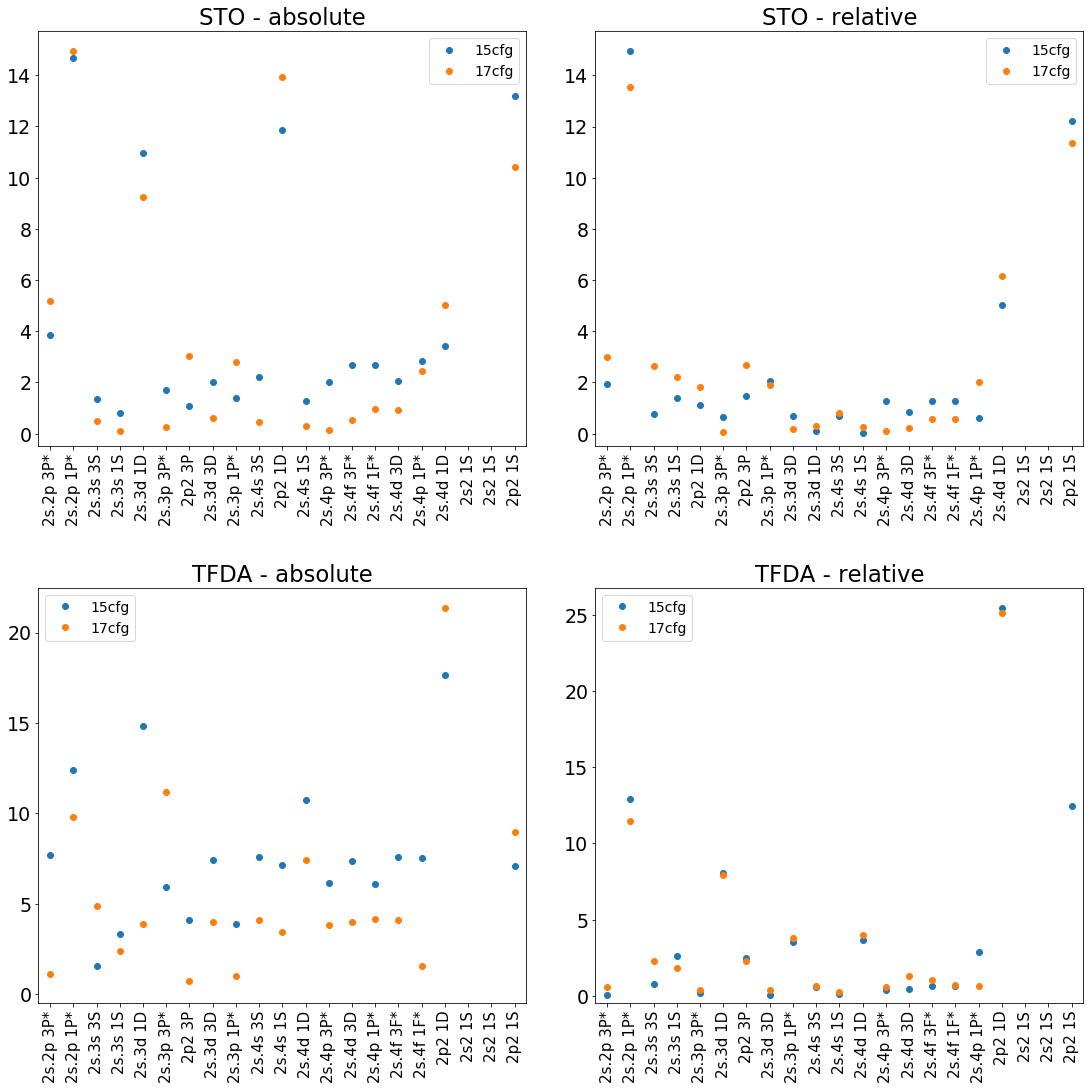

In [80]:
ymin=-0.5
xmin=0.5
xmax=21.5

fig=plt.figure(figsize=(16,16))
ax1=plt.subplot(221)
ax1.set_title('STO - absolute')
plt.plot(ener_absSTO15cfg.index,ener_absSTO15cfg['erp'],'o',label='15cfg')
plt.plot(ener_absSTO17cfg.index,ener_absSTO17cfg['erp'],'o',label='17cfg')
plt.legend(loc='best',fontsize=14)
y0min,ymax=plt.ylim()
plt.ylim(ymin,ymax)
plt.xticks(ener_absSTO15cfg.index,ener_absSTO15cfg['term'], rotation=90,fontsize=15)
plt.xlim(xmin,xmax)

ax2=plt.subplot(222)
ax2.set_title('STO - relative')
plt.plot(ener_relatSTO15cfg.index,ener_relatSTO15cfg['erp'],'o',label='15cfg')
plt.plot(ener_relatSTO17cfg.index,ener_relatSTO17cfg['erp'],'o',label='17cfg')
plt.legend(loc='best',fontsize=14)
ymin,ymax=plt.ylim()
plt.ylim(-0.5,ymax)
plt.xticks(ener_relatSTO15cfg.index,ener_relatSTO15cfg['term'], rotation=90,fontsize=15)
plt.xlim(xmin,xmax)

ax3=plt.subplot(223)
ax3.set_title('TFDA - absolute')
plt.plot(ener_absTFDA15cfg.index,ener_absTFDA15cfg['erp'],'o',label='15cfg')
plt.plot(ener_absTFDA17cfg.index,ener_absTFDA17cfg['erp'],'o',label='17cfg')
plt.legend(loc='best',fontsize=14)
ymin,ymax=plt.ylim()
plt.ylim(-0.5,ymax)
plt.xticks(ener_absTFDA15cfg.index,ener_absTFDA15cfg['term'], rotation=90,fontsize=15)
plt.xlim(xmin,xmax)

ax4=plt.subplot(224)
ax4.set_title('TFDA - relative')
plt.plot(ener_relatTFDA15cfg.index,ener_relatTFDA15cfg['erp'],'o',label='15cfg')
plt.plot(ener_relatTFDA17cfg.index,ener_relatTFDA17cfg['erp'],'o',label='17cfg')
plt.legend(loc='best',fontsize=14)
ymin,ymax=plt.ylim()
plt.ylim(-0.5,ymax)
plt.xticks(ener_relatTFDA15cfg.index,ener_relatTFDA15cfg['term'], rotation=90,fontsize=15)
plt.xlim(xmin,xmax)

plt.tight_layout(pad=2.0)
plt.show()

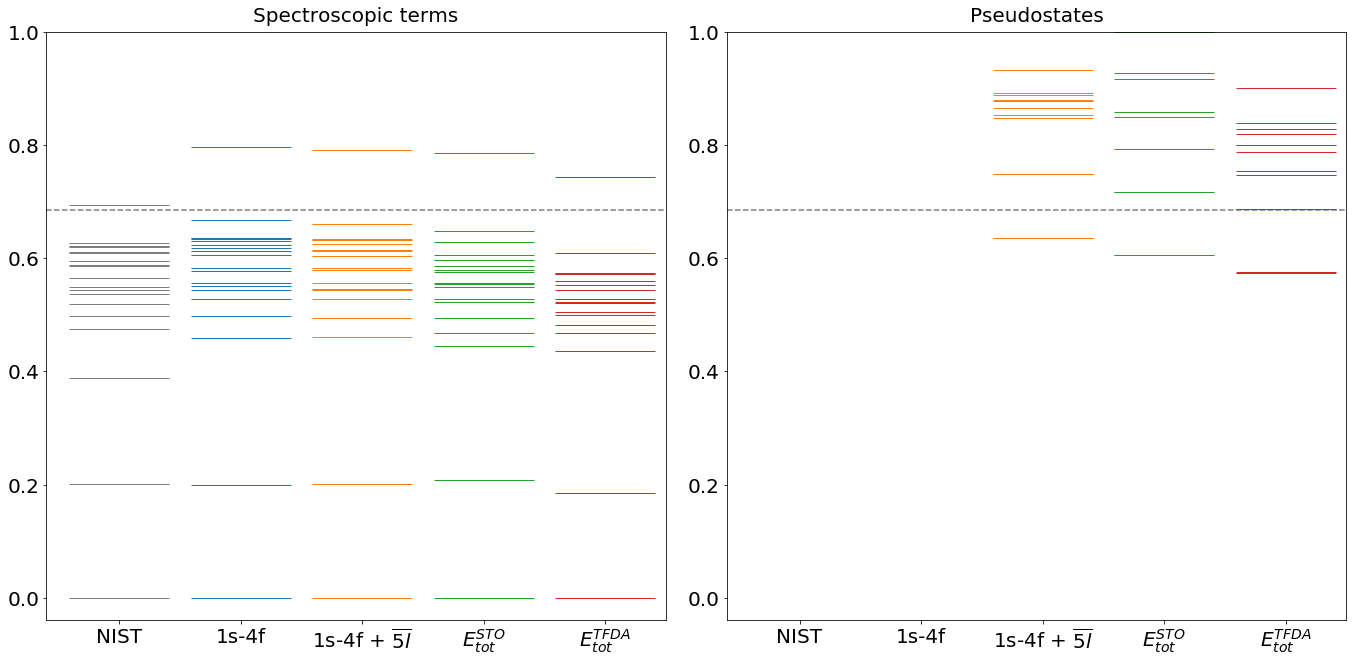

In [19]:
my_xticks = ['NIST','1s-4f',r'1s-4f + $\overline{5l}$','$E_{tot}^{STO}$','$E_{tot}^{TFDA}$']

ys_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<10]['ENERGY(RYD)']
xs_nv=ys_nv*0+2
yp_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_nv=yp_nv*0+2
ys_asbSTO15cfg=ener_absSTO15cfg.loc[ener_absSTO15cfg.loc[:]['CF']<10]['ENERGY(RYD)']
xs_asbSTO15cfg=ys_asbSTO15cfg*0+3
yp_asbSTO15cfg=ener_absSTO15cfg.loc[ener_absSTO15cfg.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_asbSTO15cfg=yp_asbSTO15cfg*0+3
ys_asbTFDA15cfg=ener_absTFDA15cfg.loc[ener_absTFDA15cfg.loc[:]['CF']<10]['ENERGY(RYD)']
xs_asbTFDA15cfg=ys_asbTFDA15cfg*0+4
yp_asbTFDA15cfg=ener_absTFDA15cfg.loc[ener_absTFDA15cfg.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_asbTFDA15cfg=yp_asbTFDA15cfg*0+4

xmin=-0.6
xmax=4.5
fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(121)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(enerNIST['Level']*0,enerNIST['Level'],'_',markersize=100,c='tab:gray')
plt.plot(ener_sp1s4f['ENERGY(RYD)']*0+1,ener_sp1s4f['ENERGY(RYD)'],'_',markersize=100,c='tab:blue')
plt.plot(xs_nv,ys_nv,'_',markersize=100,c='tab:orange')
plt.plot(xs_asbSTO15cfg,ys_asbSTO15cfg,'_',markersize=100,c='tab:green')
plt.plot(xs_asbTFDA15cfg,ys_asbTFDA15cfg,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
ymin, ymax = plt.ylim()
ymax=1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks([0,1,2,3,4], my_xticks)
ax2=plt.subplot(122)
ax2.set_title('Pseudostates',fontsize=20,pad=10)
plt.plot(xp_nv,yp_nv,'_',markersize=100,c='tab:orange')
plt.plot(xp_asbSTO15cfg,yp_asbSTO15cfg,'_',markersize=100,c='tab:green')
plt.plot(xp_asbTFDA15cfg,yp_asbTFDA15cfg,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks([0,1,2,3,4], my_xticks)
plt.tight_layout()
# plt.savefig('be0+_termenergies.eps')
plt.show()

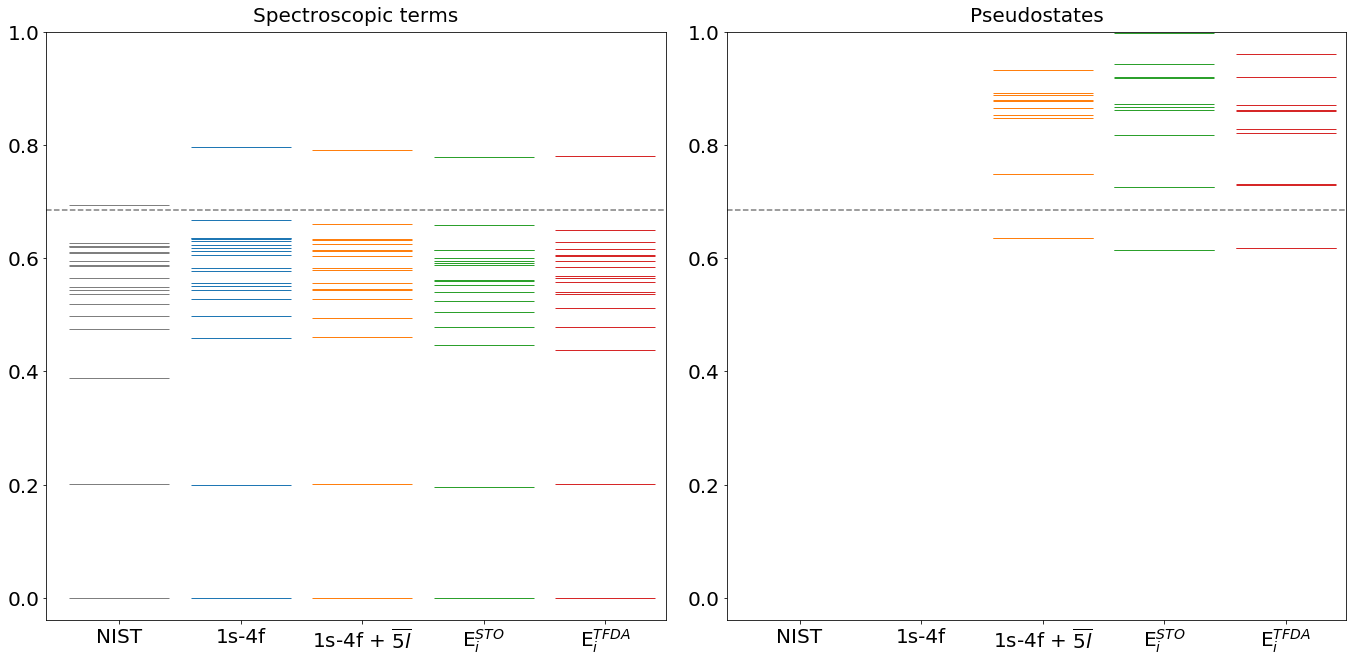

In [22]:
my_xticks = ['NIST','1s-4f',r'1s-4f + $\overline{5l}$','E$_i^{STO}$','E$_i^{TFDA}$']

ys_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<10]['ENERGY(RYD)']
xs_nv=ys_nv*0+2
yp_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_nv=yp_nv*0+2
ys_asbSTO15cfg=ener_relatSTO15cfg.loc[ener_relatSTO15cfg.loc[:]['CF']<10]['ENERGY(RYD)']
xs_asbSTO15cfg=ys_asbSTO15cfg*0+3
yp_asbSTO15cfg=ener_relatSTO15cfg.loc[ener_relatSTO15cfg.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_asbSTO15cfg=yp_asbSTO15cfg*0+3
ys_asbTFDA15cfg=ener_relatTFDA15cfg.loc[ener_relatTFDA15cfg.loc[:]['CF']<10]['ENERGY(RYD)']
xs_asbTFDA15cfg=ys_asbTFDA15cfg*0+4
yp_asbTFDA15cfg=ener_relatTFDA15cfg.loc[ener_relatTFDA15cfg.loc[:]['CF']>=10]['ENERGY(RYD)']
xp_asbTFDA15cfg=yp_asbTFDA15cfg*0+4

xmin=-0.6
xmax=4.5
fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(121)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(enerNIST['Level']*0,enerNIST['Level'],'_',markersize=100,c='tab:gray')
plt.plot(ener_sp1s4f['ENERGY(RYD)']*0+1,ener_sp1s4f['ENERGY(RYD)'],'_',markersize=100,c='tab:blue')
plt.plot(xs_nv,ys_nv,'_',markersize=100,c='tab:orange')
plt.plot(xs_asbSTO15cfg,ys_asbSTO15cfg,'_',markersize=100,c='tab:green')
plt.plot(xs_asbTFDA15cfg,ys_asbTFDA15cfg,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
ymin, ymax = plt.ylim()
ymax=1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks([0,1,2,3,4], my_xticks)
ax2=plt.subplot(122)
ax2.set_title('Pseudostates',fontsize=20,pad=10)
plt.plot(xp_nv,yp_nv,'_',markersize=100,c='tab:orange')
plt.plot(xp_asbSTO15cfg,yp_asbSTO15cfg,'_',markersize=100,c='tab:green')
plt.plot(xp_asbTFDA15cfg,yp_asbTFDA15cfg,'_',markersize=100,c='tab:red')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks([0,1,2,3,4], my_xticks)
plt.tight_layout()
# plt.savefig('be0+_termenergies.eps')
plt.show()

In [81]:
maxcfg=10
nist=enerNIST.loc[enerNIST.loc[:]['CF']<maxcfg]['Level']
x_nist=nist.index
spect=ener_sp1s4f.loc[ener_sp1s4f.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
x_spect=ener_sp1s4f.loc[ener_sp1s4f.loc[:]['CF']<maxcfg]['idx']
spect_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_nv=ener_ps5l_nv.loc[ener_ps5l_nv.loc[:]['CF']<maxcfg]['idx']
ys_absSTO15cfg=ener_absSTO15cfg.loc[ener_absSTO15cfg.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_absSTO15cfg=ener_absSTO15cfg.loc[ener_absSTO15cfg.loc[:]['CF']<maxcfg]['idx']
ys_absSTO17cfg=ener_absSTO17cfg.loc[ener_absSTO17cfg.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_absSTO17cfg=ener_absSTO17cfg.loc[ener_absSTO17cfg.loc[:]['CF']<maxcfg]['idx']
ys_relatSTO15cfg=ener_relatSTO15cfg.loc[ener_relatSTO15cfg.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_relatSTO15cfg=ener_relatSTO15cfg.loc[ener_relatSTO15cfg.loc[:]['CF']<maxcfg]['idx']
ys_relatSTO17cfg=ener_absSTO17cfg.loc[ener_absSTO17cfg.loc[:]['CF']<maxcfg]['ENERGY(RYD)']
xs_relatSTO17cfg=ener_absSTO17cfg.loc[ener_absSTO17cfg.loc[:]['CF']<maxcfg]['idx']

fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(111)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(x_nist,nist,'_',markersize=35,markeredgewidth=2,c='k')
# plt.plot(ener_sp1s4f['idx'],ener_sp1s4f['ENERGY(RYD)'],'_',markersize=35,c='tab:blue')
plt.plot(xs_nv,spect_nv,'_',markersize=35,c='tab:orange')
# plt.plot(xs_absSTO15cfg,ys_absSTO15cfg,'_',markersize=35,c='tab:green')
plt.plot(xs_relatSTO15cfg,ys_relatSTO15cfg,'_',markersize=35,c='tab:green')
# plt.plot(xs_absSTO17cfg,ys_absSTO17cfg,'_',markersize=35,c='tab:cyan')
plt.plot(xs_relatSTO17cfg,ys_relatSTO17cfg,'_',markersize=35,c='tab:cyan')
xmin, xmax = plt.xlim()
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.ylim(0.15,0.85)
my_xticks = enerNIST.loc[:]['Term'].tolist()
plt.xticks(x_nist, my_xticks)
plt.show()

In [ ]:
emin=0
emax=1.75
fig=plt.figure(figsize=(6.4*3,4.8))
ax1=plt.subplot(131)
ii=2
ax1.set_title(r'$2s^2\,^1S \rightarrow 2s 2p\,^3P$',fontsize=20,pad=10)
plt.plot(dipti_data2[0]/convRy2eV,dipti_data2[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

ax2=plt.subplot(132)
ii=3
ax2.set_title(r'$2s^2\,^1S \rightarrow 2s 2p\,^1P$',fontsize=20,pad=10)
plt.plot(dipti_data3[0]/convRy2eV,dipti_data3[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

ax3=plt.subplot(133)
ii=4
ax3.set_title(r'$2s^2\,^1S \rightarrow 2s 3s\,^3S$',fontsize=20,pad=10)
plt.plot(dipti_data4[0]/convRy2eV,dipti_data4[1],'tab:gray',linewidth=3,label='Dipti')
plt.plot(ps4l5l_nv[0],ps4l5l_nv[ii],'tab:orange',label='pseudo 4l5l')
plt.plot(ps4l5l_gp[0],ps4l5l_gp[ii],'tab:green',label='GP pseudo 4l5l')
plt.legend(loc='best')
plt.axvline(eion,linestyle='dashed', color='tab:gray')
plt.xlim(emin,emax)

plt.show()

In [ ]:
spect_nv=ener_ps4l5l_nv.loc[ener_ps4l5l_nv.loc[:]['CF']<7]['ENERGY(RYD)']
xs_nv=spect_nv*0+2
pseudo_nv=ener_ps4l5l_nv.loc[ener_ps4l5l_nv.loc[:]['CF']>=7]['ENERGY(RYD)']
xp_nv=pseudo_nv*0+2
spect_gp=ener_ps4l5l_gp.loc[ener_ps4l5l_gp.loc[:]['CF']<7]['ENERGY(RYD)']
xs_gp=spect_gp*0+3
pseudo_gp=ener_ps4l5l_gp.loc[ener_ps4l5l_gp.loc[:]['CF']>=7]['ENERGY(RYD)']
xp_gp=pseudo_gp*0+3


xmin=-0.6
xmax=3.4
fig=plt.figure(figsize=(6.4*3,4.8*2))
ax1=plt.subplot(121)
ax1.set_title('Spectroscopic terms',fontsize=20,pad=10)
plt.plot(enerNIST['Level']*0,enerNIST['Level'],'_',markersize=100,c='tab:gray')
plt.plot(xs_nv,spect_nv,'_',markersize=100,c='tab:orange')
plt.plot(xs_gp,spect_gp,'_',markersize=100,c='tab:green')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
ax2=plt.subplot(122)
ax2.set_title('Pseudostates',fontsize=20,pad=10)
plt.plot(xp_nv,pseudo_nv,'_',markersize=100,c='tab:orange')
plt.plot(xp_gp,pseudo_gp,'_',markersize=100,c='tab:green')
plt.hlines(eion,xmin,xmax,colors='tab:gray',linestyles='dashed')
plt.xlim(xmin,xmax)
plt.tight_layout()
plt.show()